# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
sample_cities= cities
units= "imperial"
url= 'http://api.openweathermap.org/data/2.5/weather?q='
temp= []
humidity= []
cloudiness= []
windspeed= []
lat= []
lon= []
country= []
date= []
cities_found= []
record= 0

for cities in sample_cities:
    time.sleep(2)
    record= record + 1
    print(f'Processing record:{record} | {cities}')
    try:
        query_url= f"{url}{cities}&appid={weather_api_key}&units={units}"
        response= requests.get(query_url).json()
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(response['name'])
    except KeyError:
        print("City not found. Skipping...")







Processing record:1 | toora-khem
Processing record:2 | nanortalik
Processing record:3 | hilo
Processing record:4 | avera
Processing record:5 | geraldton
Processing record:6 | mar del plata
Processing record:7 | aripuana
Processing record:8 | east london
Processing record:9 | illoqqortoormiut
City not found. Skipping...
Processing record:10 | severo-kurilsk
Processing record:11 | samusu
City not found. Skipping...
Processing record:12 | ancud
Processing record:13 | thompson
Processing record:14 | albany
Processing record:15 | parsons
Processing record:16 | galgani
City not found. Skipping...
Processing record:17 | tatarsk
Processing record:18 | ushuaia
Processing record:19 | barrow
Processing record:20 | lamesa
Processing record:21 | estelle
Processing record:22 | tiksi
Processing record:23 | attawapiskat
City not found. Skipping...
Processing record:24 | eureka
Processing record:25 | hobart
Processing record:26 | nikolskoye
Processing record:27 | kapaa
Processing record:28 | bilibino
P

Processing record:234 | ilulissat
Processing record:235 | ust-ishim
Processing record:236 | otradnoye
Processing record:237 | saint-georges
Processing record:238 | roebourne
Processing record:239 | mvuma
Processing record:240 | santa rosa
Processing record:241 | talakan
Processing record:242 | paita
Processing record:243 | portland
Processing record:244 | mariestad
Processing record:245 | bitung
Processing record:246 | grand gaube
Processing record:247 | lasa
Processing record:248 | keti bandar
Processing record:249 | hasaki
Processing record:250 | otane
Processing record:251 | santa marta
Processing record:252 | teknaf
Processing record:253 | zelenoborsk
Processing record:254 | paamiut
Processing record:255 | burns lake
Processing record:256 | tasiilaq
Processing record:257 | novaya igirma
Processing record:258 | umzimvubu
City not found. Skipping...
Processing record:259 | srednekolymsk
Processing record:260 | jianhu
Processing record:261 | aksha
Processing record:262 | khandbari
Pro

Processing record:465 | kirakira
Processing record:466 | sao filipe
Processing record:467 | craig
Processing record:468 | panjwin
City not found. Skipping...
Processing record:469 | lahaina
Processing record:470 | ati
Processing record:471 | komsomolskiy
Processing record:472 | sobolevo
Processing record:473 | inca
Processing record:474 | tabiauea
City not found. Skipping...
Processing record:475 | zaoyang
Processing record:476 | kabwe
Processing record:477 | aras
Processing record:478 | vanimo
Processing record:479 | turayf
Processing record:480 | scarborough
Processing record:481 | marystown
Processing record:482 | palana
Processing record:483 | mount gambier
Processing record:484 | stornoway
Processing record:485 | seymchan
Processing record:486 | gushi
Processing record:487 | almeria
Processing record:488 | ende
Processing record:489 | wanaka
Processing record:490 | topraisar
Processing record:491 | ambilobe
Processing record:492 | naron
Processing record:493 | methoni
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
countries_dict= {"Cities": cities_found,"Temp": temp, "Humidity":humidity, "Cloudiness":cloudiness,"Windspeed":windspeed,
                 "Lat":lat, "Lng":lon, "Country":country, "Date": date}

countries_df= pd.DataFrame(countries_dict)
countries_df

,Cities,Temp,Humidity,Cloudiness,Windspeed,Lat,Lng,Country,Date
0,Toora-Khem,21.16,88,3,2.28,52.4675,96.1100,RU,1634513483
1,Nanortalik,35.28,89,99,1.36,60.1432,-45.2371,GL,1634513486
2,Hilo,78.87,70,75,5.75,19.7297,-155.0900,US,1634513238
3,Avera,58.30,50,0,5.59,33.1940,-82.5271,US,1634513490
4,Geraldton,55.81,76,0,12.66,-28.7667,114.6000,AU,1634513493
...,...,...,...,...,...,...,...,...,...
562,Qaqortoq,33.96,70,95,0.65,60.7167,-46.0333,GL,1634514890
563,Whitehorse,33.46,60,75,11.99,60.7161,-135.0538,CA,1634514892
564,Canchungo,73.53,92,68,7.02,12.0672,-16.0333,GW,1634514895
565,Torrijos,66.34,90,100,5.91,39.9819,-4.2835,ES,1634514897


In [5]:
countries_df.describe()

,Temp,Humidity,Cloudiness,Windspeed,Lat,Lng,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,57.743404,72.174603,56.495591,7.788519,21.098108,22.363978,1.634514e+09
std,20.240976,19.740799,37.563368,6.157990,34.067437,90.367703,4.142835e+02
min,-8.320000,9.000000,0.000000,0.000000,-54.800000,-179.166700,1.634513e+09
25%,42.950000,62.000000,19.500000,3.320000,-8.206800,-56.069250,1.634514e+09
50%,59.160000,78.000000,70.000000,6.460000,27.269600,27.245300,1.634514e+09
75%,75.260000,86.000000,92.000000,10.870000,50.299050,103.205600,1.634515e+09
max,92.880000,100.000000,100.000000,43.660000,78.218600,178.416700,1.634515e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
max(countries_df['Humidity'])

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

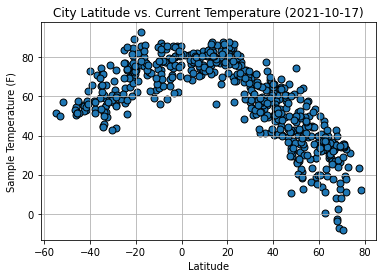

In [7]:
# pull out date the date was pulled
# credit to https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date
date_run= countries_df['Date'][0]
date_run= datetime.utcfromtimestamp(date_run).strftime('%Y-%m-%d')

countries_df.plot.scatter('Lat','Temp', title= f"City Latitude vs. Current Temperature ({date_run})",
                          xlabel="Latitude", ylabel="Sample Temperature (F)", grid=True,
                          edgecolor= 'black', s=48)

print()

This plot is investigating how temperature is correlated with latitude. 

## Latitude vs. Humidity Plot

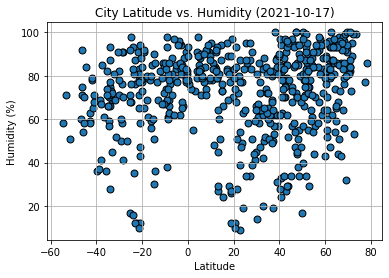

In [8]:
countries_df.plot.scatter('Lat','Humidity', s=48, edgecolor= 'black', grid=True,
                          title=f"City Latitude vs. Humidity ({date_run})", xlabel="Latitude", ylabel="Humidity (%)")

print()

This plot is investigating how humidity is correlated with latitude. 

## Latitude vs. Cloudiness Plot

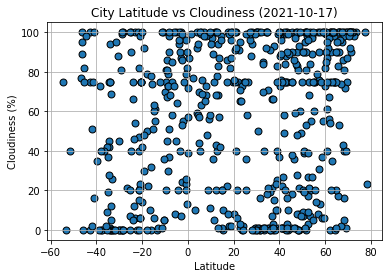

In [9]:
countries_df.plot.scatter('Lat','Cloudiness', s=48, edgecolor='black', grid=True, xlabel="Latitude", 
                          ylabel="Cloudiness (%)", title= f"City Latitude vs Cloudiness ({date_run})" )
print()

This plot is investigating how cloudiness is correlated with latitude. 

## Latitude vs. Wind Speed Plot

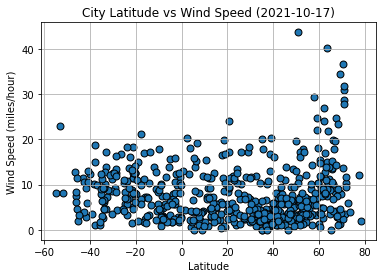

In [10]:
countries_df.plot.scatter('Lat','Windspeed', s=48, edgecolor= 'black', grid=True, ylabel= "Wind Speed (miles/hour)", 
                          xlabel= 'Latitude', title=f"City Latitude vs Wind Speed ({date_run})")

print()

This plot is investigating how windiness is correlated with latitude. 

## Linear Regression

In [11]:
countries_df
northern_df= countries_df.loc[countries_df['Lat'] > 0, :]
southern_df= countries_df.loc[countries_df['Lat'] < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 value is: 0.761623833338175


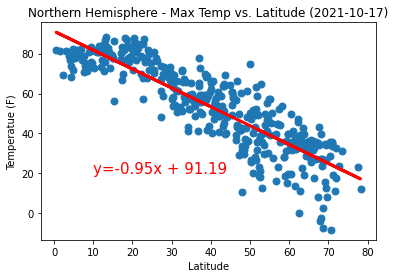

In [12]:
northern_df.plot.scatter('Lat','Temp', s=48, ylabel= "Temperatue (F)", xlabel= "Latitude", 
                         title= f"Northern Hemisphere - Max Temp vs. Latitude ({date_run})")

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Temp'])

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f"y={round(slope,2)}x + {round(intercept,2)}", xy=(10,20), color='red', size=15 )

print(f"The r^2 value is: {rvalue**2}")

plt.show()

This plot illustrating norther hemisphere temperatures shows a strong negative correlation between increasingly northern latitudes and temperature. In other words, as we move away from the equator temperaturs go down. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r^2 value is: 0.4863768177026845


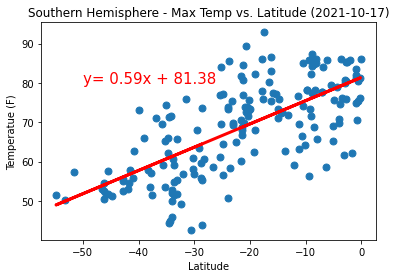

In [13]:
southern_df.plot.scatter('Lat','Temp', s=48, ylabel= "Temperatue (F)", xlabel= "Latitude", 
                         title= f"Southern Hemisphere - Max Temp vs. Latitude ({date_run})")

(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_df['Lat'],southern_df['Temp'])

plt.plot(southern_df['Lat'],slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f"y= {round(slope,2)}x + {round(intercept,2)}", xy=(-50,80), color='red', size=15)

print(f"The r^2 value is: {rvalue**2}")

plt.show()


This plot, which illustrates temperatures as a function of latitude in the southern hemisphere, demonstrates a somewhat strong positive correlation between increasingly northern latitudes and temperature. Said another way, temperatures are trending up as we move towards the equator. However, the correlation is not as strong as it was for the northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r^2 value is: 0.020957268445859746



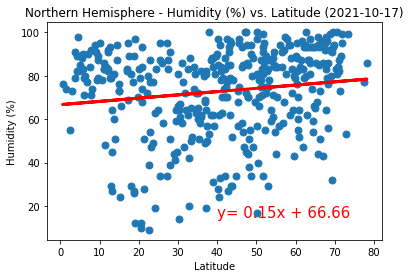

In [14]:
northern_df.plot.scatter('Lat','Humidity', s=48, xlabel='Latitude', ylabel= 'Humidity (%)',
                         title=f'Northern Hemisphere - Humidity (%) vs. Latitude ({date_run})')

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Humidity'])

plt.plot(northern_df['Lat'], slope*northern_df['Lat'] + intercept, color='red', linewidth='3')

plt.annotate(f"y= {round(slope,2)}x + {round(intercept,2)}", xy=(40,15), color= "red", size=15 )

print(f"The r^2 value is: {rvalue**2}")

print()

This plot shows very little correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

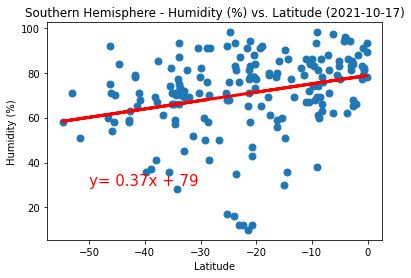

In [15]:
southern_df.plot.scatter('Lat','Humidity', s=48, xlabel='Latitude', ylabel= 'Humidity (%)',
                         title=f'Southern Hemisphere - Humidity (%) vs. Latitude ({date_run})')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Lat'],southern_df['Humidity'])

plt.plot(southern_df['Lat'], slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept)}', xy=(-50,30), color='red', size=15)

plt.show()

This plot shows a very little correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r^2 value is: 0.007729855289609395



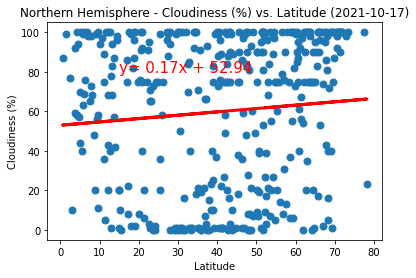

In [16]:
northern_df.plot.scatter('Lat', 'Cloudiness', s=48, xlabel= "Latitude", ylabel= 'Cloudiness (%)',
                         title=f'Northern Hemisphere - Cloudiness (%) vs. Latitude ({date_run})' )

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Cloudiness'])

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', xy=(15,80), color='red', size=15 )

print(f'The r^2 value is: {rvalue**2}')

print()

This plot shows very little correlation between cloudiness and latitudue.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r^2 value is: 0.03425253250852082



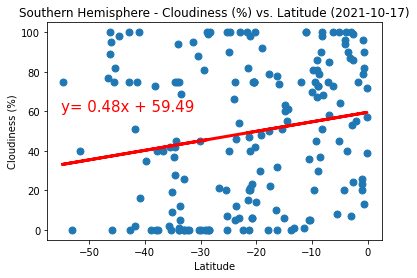

In [17]:
southern_df.plot.scatter('Lat', 'Cloudiness', s=48, xlabel= "Latitude", ylabel= 'Cloudiness (%)',
                         title=f'Southern Hemisphere - Cloudiness (%) vs. Latitude ({date_run})' )

(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_df['Lat'],southern_df['Cloudiness'])

plt.plot(southern_df['Lat'], slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', color='red', size=15, xy= (-55,60))

print(f'The r^2 value is: {rvalue**2}' )

print()

This plot also shows very little correlation between cloudiness and latitudue.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 value is: 0.04195568782677



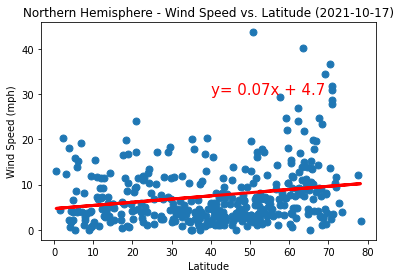

In [18]:
northern_df.plot.scatter('Lat','Windspeed', s=48, xlabel= "Latitude", ylabel= 'Wind Speed (mph)', 
                         title=f"Northern Hemisphere - Wind Speed vs. Latitude ({date_run})" )

(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_df['Lat'],northern_df['Windspeed'])

plt.plot(northern_df['Lat'],slope*northern_df['Lat'] + intercept,color='red', linewidth=3)

plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', xy=(40,30), color='red', size=15)

print(f'The r^2 value is: {rvalue**2}')
             
print()

This plot shows very little correlation between windiness and latitudue.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r^2 value is: 0.02811895150797982


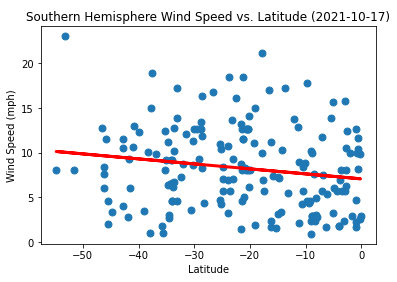

In [19]:
southern_df.plot.scatter('Lat','Windspeed', s=48, xlabel="Latitude", ylabel= "Wind Speed (mph)",
                        title= f"Southern Hemisphere Wind Speed vs. Latitude ({date_run})")

(slope, intercept, rvalue, pvalue, stderr)= linregress(southern_df['Lat'],southern_df['Windspeed'])

plt.plot(southern_df['Lat'],slope*southern_df['Lat'] + intercept, color='red', linewidth=3)

plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}', xy=(-25,25), color='red', size=15)

print(f'The r^2 value is: {rvalue**2}')

plt.show()

This plot also shows very little correlation between windiness and latitudue.

In [21]:
#output data to csv

countries_df.to_csv(output_data_file)
